<a href="https://colab.research.google.com/github/NeelKanwal/BERTOLOGY-Based-Extractive-Summarization-for-Clinial-Notes/blob/master/BaselineMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy
!python -m spacy download en_core_web_lg
!pip install jsonlines

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Loading  Data from a Demo of 100 Summaries. 
https://physionet.org/content/mimiciii-demo/1.4/


In [0]:
import jsonlines as js
book = []
with js.open("notes_labeled_dev.ndjson") as reader:
  num = 0
  for summary in reader:
    if num<100:
        book.append(summary[2])
        num = num + 1

clinical_notes = [" ".join( sum(book[i],[])) for i in range(100)]

In [22]:
# Total Discharge summaries we have for establishing the experiment
print(len(clinical_notes))

100


In [0]:
#Evaluation Criteria Based on probabilty distribution sripada et al .
from scipy.stats import entropy
from scipy.spatial import distance

from collections import Counter
from collections import OrderedDict

def kld(summ, org): 
        dist_original=Counter(org.lower().split())
        dist_summary=Counter(summ.lower().split())
        q = list(dist_original.values())
        p=list(dist_summary.values())
        a=min(len(p),len(q))
        return entropy(p[0:a],qk=q[0:a])
 
def jsd(summ,org):
        dist_original=Counter(org.lower().split())
        dist_summary=Counter(summ.lower().split())
        p = list(dist_original.values())
        q = list(dist_summary.values())
        a=min(len(p),len(q))
        return distance.jensenshannon(p[0:a],q[0:a])

#Frequency Based Summarizer


In [0]:
import spacy
from collections import Counter
from string import punctuation
import en_core_web_lg
nlp = en_core_web_lg.load()
# nlp = spacy.load("en_core_web_lg")

In [0]:
# Function using POS summarization based on idea similar to Edmundson et al
def summarize(text):
    keyword = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    doc = nlp(text.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            keyword.append(token.text)
    
    freq_word = Counter(keyword)
    max_freq = Counter(keyword).most_common(1)[0][1]
    for w in freq_word:
        freq_word[w] = (freq_word[w]/max_freq)
        
    sent_strength={}
    for sent in doc.sents:
        for word in sent:
            if word.text in freq_word.keys():
                if sent in sent_strength.keys():
                    sent_strength[sent]+=freq_word[word.text]
                else:
                    sent_strength[sent]=freq_word[word.text] 
    summary = []
    
    sorted_x = sorted(sent_strength.items(), key=lambda kv: kv[1], reverse=True)
    limit=len(sorted_x)/15
    counter = 0
    for i in range(len(sorted_x)):
        summary.append(str(sorted_x[i][0]).capitalize())

        counter += 1
        if(counter >= limit):
            break
            
    return ' '.join(summary)

In [7]:
summary=[summarize(note) for note in clinical_notes]
summary[0]

'Po daily daily aspirin mg tablet chewable sig one tablet chewable po daily daily disp tablet chewable Release hr po daily daily disp tablet sustained release hr s refills multivitamin tablet sig one tablet Two tablet po daily daily disp tablet s refills valsartan mg tablet sig One tablet po daily daily metoprolol succinate mg tablet sustained release hr sig It is very important to follow this up with your pcp nametoken make sure to schedule an outpatient upper endoscopy you were started on several medications that have been shown to prevent repeat heart attacks you were started on aspirin mg every day you were started on metoprolol succinate toprol xl mg every day Mg daily lipitor mg daily metoprolol succinate Every hours disp tablet delayed release e.c. s refills discharge disposition home discharge diagnosis non st elevation mi discharge condition mental status clear and coherent level of consciousness alert and interactive activity status'

In [8]:
from collections import Counter
from collections import OrderedDict
#  forming a frequency distribution for words
dist_original=Counter(clinical_notes[0].lower().split())
dis_summary=Counter(summary[0].lower().split())

print(list(dist_original.values()))
print(list(dis_summary.values()))

[4, 3, 13, 6, 32, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 7, 7, 1, 1, 13, 1, 2, 8, 1, 21, 3, 1, 14, 1, 1, 13, 1, 1, 3, 7, 6, 18, 2, 2, 2, 2, 2, 2, 2, 2, 33, 1, 1, 1, 8, 8, 14, 8, 2, 1, 15, 10, 1, 6, 3, 4, 1, 1, 23, 2, 4, 1, 1, 1, 6, 1, 1, 2, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 1, 5, 1, 2, 6, 1, 3, 1, 1, 1, 1, 6, 1, 2, 2, 1, 1, 1, 1, 1, 8, 2, 3, 2, 1, 20, 13, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2, 9, 1, 2, 2, 3, 2, 4, 1, 1, 2, 14, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 10, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 12, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
kld_freq=[kld(summary[i],clinical_notes[i]) for i in range(100)]
print(kld_freq)
jsd_freq=[jsd(summ,org) for org,summ in zip(clinical_notes,summary)]
print(jsd_freq)

[0.7577055302591231, 0.6724955699846915, 1.070928612895553, 0.8611214568206421, 0.7480044078002737, 0.69722579646108, 0.8643011553131651, 0.923047926719347, 0.4395323907700038, 0.7398061570374466, 0.6264512224990744, 1.0350567373729644, 0.6897696813178312, 0.8533041176018525, 0.8407255228088959, 0.8415104367861332, 1.3358199911206723, 0.8058505055071291, 1.329491133028707, 1.0229949885942295, 1.080568531323066, 0.8929812088611176, 0.8071527836898866, 0.8957256034612907, 1.0605624386180001, 1.051192019559989, 0.9095331071231565, 0.993102295569263, 1.0300034578576844, 0.733536347379308, 0.8003075560165893, 0.7531472298039397, 0.69787077424789, 0.8226108542376898, 0.8716897006997278, 0.5053635368460568, 0.8165573453966729, 0.7871067575101421, 0.87541249988547, 0.7589212611755358, 0.8080335827430819, 1.0153818417197624, 0.8822355354068583, 0.7170298851888067, 0.6369790543960839, 0.5570010255777922, 0.5883607353960865, 1.0002572444932296, 0.26407334729210813, 0.43147791864880575, 1.17904210

In [11]:
import statistics as sc
print(sc.mean(kld_freq))
print(sc.mean(jsd_freq))

0.8276050645210086
0.4169984078449801


In [134]:
!pip install sumy
!pip install lexrank

Algorithm
It uses greedy optimization approach:

Set S={} and d=0
while |S|<= L do:
for i in [1...ND] , di=KL(Ps||PD)
Set S=S + Si with minimum di and d=di
Stop if there is no i such that di:<d

In [0]:
# from sumy.summarizers.kl import KLSummarizer
# from sumy.summarizers import AbstractSummarizer

#Graph Based Summarization



In [139]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer 
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
import nltk
nltk.download('punkt')

# parser=PlaintextParser.from_string(clinical_notes,Tokenizer("english"))
summarizer_g = TextRankSummarizer()
summarizer_l = LexRankSummarizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def graph_summarizer(doc):
      parser=PlaintextParser.from_string(doc,Tokenizer("english"))
      # return summarizer_g(parser.document,5)
      return summarizer_l(parser.document,5)


In [140]:
summary_graph = [graph_summarizer(summ) for summ in clinical_notes]
for sentence in summary_graph[0]:
    print(sentence , end= " ")

admission date december discharge date december date of birth august sex m service medicine allergies demerol attending firstnametoken chief complaint chest pain major surgical or invasive procedure cardiac catherization with balloon angiopasty of the obtuse marginal history of present illness dr. firstnametoken lastnametoken is a yo retired orthopedic surgeon with a history of htn hld who presented to firstnametoken lastnametoken hosptial today with substernal chest pain his chest pain started at in the morning while he was walking to an appointment it gradually worsened and he went to ed instead of appointment at most severe cp may but reports that he tends to be stoic cp has been intermittent since then morphine helped to make him cp free he denies radiation of cp or associated symptoms he denies lh dizzines nausea vomiting sweating shortness of breath cp currently february he reports some indigestion and belching since this am at osh he was given plavix mg po x1 aspirin mg po x1 lo

In [0]:
final_summ = [None]*100
for i in range(100):
  final_summ[i] = "".join(str(list(summary_graph[i])))

In [193]:
final_summ[0]

'[<Sentence: admission date december discharge date december date of birth august sex m service medicine allergies demerol attending firstnametoken chief complaint chest pain major surgical or invasive procedure cardiac catherization with balloon angiopasty of the obtuse marginal history of present illness dr. firstnametoken lastnametoken is a yo retired orthopedic surgeon with a history of htn hld who presented to firstnametoken lastnametoken hosptial today with substernal chest pain his chest pain started at in the morning while he was walking to an appointment it gradually worsened and he went to ed instead of appointment at most severe cp may but reports that he tends to be stoic cp has been intermittent since then morphine helped to make him cp free he denies radiation of cp or associated symptoms he denies lh dizzines nausea vomiting sweating shortness of breath cp currently february he reports some indigestion and belching since this am at osh he was given plavix mg po x1 aspiri

In [195]:
kld_graph=[kld(final_summ[i],clinical_notes[i]) for i in range(100)]
print(kld_graph)
jsd_graph=[jsd(summ,org) for org,summ in zip(clinical_notes,final_summ)]
print(jsd_graph)

[0.711385483865886, 0.5999000435394114, 0.9881893081826885, 0.7824564952546272, 0.7196290442594218, 0.7957677998027057, 0.7738229919642997, 0.9776520767300527, 0.3866588463709308, 0.6537348742927991, 0.7292356233534165, 1.0184953684983957, 0.7508225669598498, 0.5396398321452723, 0.5911980841418639, 0.6897434643415008, 0.7572344931908024, 0.807964274277287, 1.0621604762964814, 1.0555816138120362, 0.902091916913427, 0.7780197986815063, 0.6933687069184855, 0.7006124884462626, 0.9172167657000462, 1.0105410266275117, 0.6370786067636013, 1.027445851541342, 1.1473531647761568, 0.6159367979076318, 0.9999568148896114, 0.7971116075606131, 0.7529233044191737, 0.6712294178283786, 0.9565261503584985, 0.38278778456394036, 0.7643634193029363, 0.6336424079212222, 0.7849971625741369, 0.733889855476754, 0.7567863413571705, 0.8073464869107218, 0.83568468446231, 0.6038071585811959, 0.7000355517384312, 0.5506498003346324, 0.5250519184428237, 0.8844874338459516, 0.7332107518737847, 0.38379553661777305, 0.92

In [197]:
import statistics as sc
print(sc.mean(kld_graph))
print(sc.mean(jsd_graph))

0.7694483871242984
0.39395952585783395


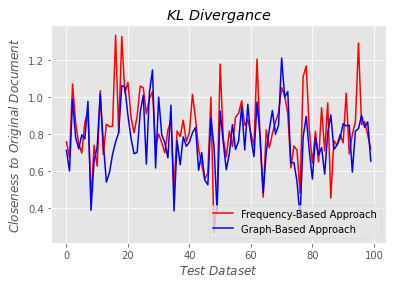

In [215]:
# Graphical Presentation of KLD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(kld_freq,'r',label= "Frequency-Based Approach")
plt.plot(kld_graph,'b',label="Graph-Based Approach")
plt.xlabel("$Test\ Dataset$")
plt.ylabel("$Closeness\ to\ Original\ Document$")
plt.title("$KL\  Divergance$")
plt.legend(loc= "lower right")
plt.savefig("kld.jpg")
plt.show()

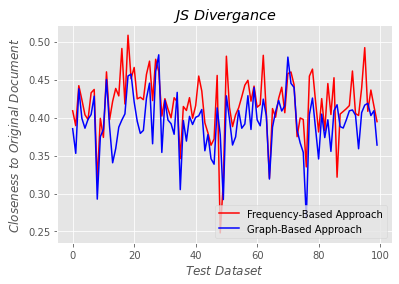

In [214]:
# Graphical Presentation of JSD
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(jsd_freq,'r',label= "Frequency-Based Approach")
plt.plot(jsd_graph,'b',label="Graph-Based Approach")
plt.xlabel("$Test\ Dataset$")
plt.ylabel("$Closeness\ to\ Original\ Document$")
plt.title("$JS\  Divergance$")
plt.legend(loc= "lower right")
plt.savefig("jsd.jpg")
plt.show()
